In [1]:
import numpy as np
import pandas as pd

# Indexing with NA values
pandas allows indexing with NA values in a boolean array, which are treated as False.

Changed in version 1.0.2.

In [3]:
s = pd.Series([1, 2, 3])
mask = pd.array([True, False, pd.NA], dtype="boolean")
s[mask]

0    1
dtype: int64

If you would prefer to keep the NA values you can manually fill them with fillna(True).

In [5]:
s[mask.fillna(True)]

0    1
2    3
dtype: int64

# Kleene logical operations
arrays.BooleanArray implements Kleene Logic (sometimes called three-value logic) for logical operations like & (and), | (or) and ^ (exclusive-or).

This table demonstrates the results for every combination. These operations are symmetrical, so flipping the left- and right-hand side makes no difference in the result.

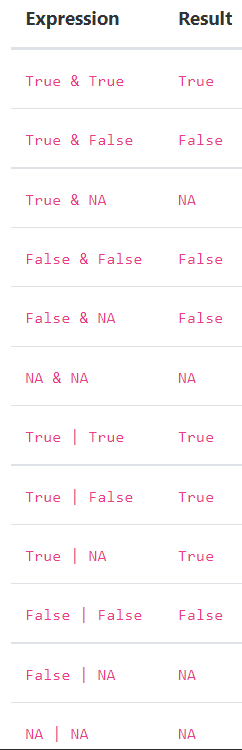
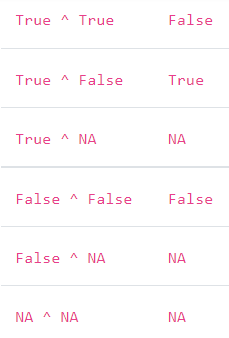

When an NA is present in an operation, the output value is NA only if the result cannot be determined solely based on the other input. For example, True | NA is True, because both True | True and True | False are True. In that case, we don’t actually need to consider the value of the NA.

On the other hand, True & NA is NA. The result depends on whether the NA really is True or False, since True & True is True, but True & False is False, so we can’t determine the output.

This differs from how np.nan behaves in logical operations. pandas treated np.nan is always false in the output.

In or

In [6]:
pd.Series([True, False, np.nan], dtype="object") | True

0     True
1     True
2    False
dtype: bool

In [7]:
pd.Series([True, False, np.nan], dtype="boolean") | True

0    True
1    True
2    True
dtype: boolean

In and

In [8]:
pd.Series([True, False, np.nan], dtype="object") & True

0     True
1    False
2    False
dtype: bool

In [10]:
pd.Series([True, False, np.nan], dtype="boolean") & True

0     True
1    False
2     <NA>
dtype: boolean